In [49]:
import sys 
sys.path.append('../fsp')
import monteCarloSimulation as mcs
import bapm_exact as be
import numpy as np
import math
import IPython.display as display


In [50]:
# 1A. Compute the $E[V_N], for a given probability$ 
# Test with example from notes. 
S0 = 4
K = 5
u = 2
d = 0.5
r = 0.25

exp = be.bapm_exact(u, d, r, S0)
exp.setOption(True, True, K, 1)

# Computes the expected value of V_n for a N, and probability.
V0 = exp.pathIndependentExpectedValue(1,exp.riskNeutralProbability())
display.Math(r"$ E[V_N] = " + str( V0[0]) + "$")

<IPython.core.display.Math object>

In [51]:
# 1B. Generate a replicating portfolio
# Test with example from notes.

S0 = 4
K = 5
u = 2
d = 0.5
r = 0.25

exp = be.bapm_exact(u, d, r, S0)
exp.setOption(True, True, K, 1)
VH = exp.V(S0*u)
VL = exp.V(S0*d)
V0, Deltas = exp.singleStepReplicatingPortfolio(VH, VL)
display.Math(r"$ E[V_N] = " + str( V0) + r"$ " + r", $ \Delta = " + str( Deltas) + r"$")

<IPython.core.display.Math object>

In [52]:
# 1C. Generate a MultiStep replicating portfolio
# Test with example from notes.

S0 = 4
K = 3
u = 2
d = 0.5
r = 0.25

exp = be.bapm_exact(u, d, r, S0)
exp.setOption(True, True, K, 2)
VH = exp.V(S0*u)
VL = exp.V(S0*d)
V0, Deltas = exp.recursiveReplicatingPortfolio(2)
print(Deltas)
# display.Math(r"$ E[V_N] = " + str( V0) + r"$ " + r", $ \Delta = " + str( Deltas) + r"$")
# The Deltas are stored in a binary tree, so the first element is the root, the second and third are the children of the root, the fourth and fifth are the children of the second, and so on.

VH  (array([1.]), 1) VL  (array([0.]), 1)
VH  (array([13.]), 1) VL  (array([1.]), 1)
VH  (5.6, 2.0) VL  (0.4, 0.16666666666666666)
[0.8666666666666666, 0.16666666666666666, 2.0]


The delta's are not path independent, the however, only depend on the previous time-steps, they are adapted to the filtration.

In [53]:
# 1D
S0 = 1
u = 1.1
d = 1.01
r = 0.05
N = 5
K = (1+r)**N * S0


exp = be.bapm_exact(u, d, r, S0)
exp.setOption(True, True, K, N)
p_tilda = exp.riskNeutralProbability()
V0 = exp.pathIndependentExpectedValue(N, p_tilda)
print("V0: ", V0[0], "SN: ", V0[1])

V0 = exp.pathIndependentExpectedValue(N, p_tilda - 0.2)
print("V0: ", V0[0], "SN: ", V0[1])

V0 = exp.pathIndependentExpectedValue(N, p_tilda + 0.2)
print("V0: ", V0[0], "SN: ", V0[1])

# 2D1: You are observing a risk premium, depending on if you are buying or selling the option.

V0 = exp.recursiveReplicatingPortfolio(N)
print("V0: ", V0[0], "Deltas (in a binary tree): ", V0[1])

# 2D2: There is no short selling, but you can borrow money at the risk free rate.



V0:  0.0390314752053499 SN:  0.9999999999999994
V0:  0.007690946873016782 SN:  0.9171745411267206
V0:  0.09934960622896158 SN:  1.0887038735338368
VH  (array([0.]), 1) VL  (array([0.]), 1)
VH  (array([0.]), 1) VL  (array([0.]), 1)
VH  (0.0, -0.0) VL  (0.0, -0.0)
VH  (array([0.]), 1) VL  (array([0.]), 1)
VH  (array([0.08147154]), 1) VL  (array([0.]), 1)
VH  (0.034485306878306934, 0.9052393055555562) VL  (0.0, -0.0)
VH  (0.01459695529240505, 0.3831700764256323) VL  (0.0, -0.0)
VH  (array([0.]), 1) VL  (array([0.]), 1)
VH  (array([0.08147154]), 1) VL  (array([0.]), 1)
VH  (0.034485306878306934, 0.9052393055555562) VL  (0.0, -0.0)
VH  (array([0.08147154]), 1) VL  (array([0.]), 1)
VH  (array([0.20245944]), 1) VL  (array([0.08147154]), 1)
VH  (0.12880375000000016, 1.3443099999999992) VL  (0.034485306878306934, 0.9052393055555562)
VH  (0.07276629993561219, 1.047982701352146) VL  (0.01459695529240505, 0.3831700764256323)
VH  (0.038523807005764445, 0.6463260515911898) VL  (0.006178605414774625,

Monte Carlo


In [54]:
# 2A

S0 = 1
u = 1.1
d = 1.01
r = 0.05
N = 5
K = (1+r)**N * S0


mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=S0)
mc.setOption(True, True, K, N)
mc.setRNG(np.random.seed(654321))
p_tilda = mc.riskNeutralProbability()
print(p_tilda)

for m in [1,5,3,10,32, (2**21)-1]:
    S, V = mc.simulatePathDependent(1, 5, m, p_tilda)
    print("V0: ", np.mean(V), "SN: ", np.mean(S))



0.4444444444444444
V0:  0.15863226692973567 SN:  1.1586322669297358
V0:  0.012767016290733277 SN:  0.9622344351621079
V0:  0.04255672096911092 SN:  1.0348213974140208
V0:  0.07002750225814695 SN:  1.0573943569759905
V0:  0.027868133341952154 SN:  0.985575562337954
V0:  0.039005643049756455 SN:  0.9999490929210786


In [55]:
#2B

S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=S0)
mc.setOption(True, True, K, N)
mc.setRNG(np.random.seed(22))
p_tilda = mc.riskNeutralProbability()

print(p_tilda)
S, V = mc.simulatePathDependent(S0, N, 32, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 256, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**10, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**11, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**21, p_tilda)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

0.18367346938773846
V0:  0.008193411816358243 SN:  1.0001938652984252
V0:  0.007334748959789231 SN:  1.0004136374652213
V0:  0.007711519742868852 SN:  1.0007865955585675
V0:  0.00772243298669084 SN:  1.0002057811767604
V0:  0.0075836484510681534 SN:  1.0000018188066009


In [56]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

ep = be.bapm_exact(u, d, r, S0)
ep.setOption(True, True, K, N)
p_tilda = ep.riskNeutralProbability()
p = p_tilda * 0.9

paths = ep.generateRandomPaths(maxPathLength=10, numPaths=5, p=p)
SA_10 = ep.stockPrice(len(paths[0])-np.sum(paths, axis=1), np.sum(paths, axis=1))

import random
for SE in SA_10:
    for M in [2**4, 2**8, 2**16, 2**21]:
        mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=SE)
        mc.setRNG(np.random.seed(random.randint(0, 2**32)))
        mc.setOption(True, True, K, N)
        S, V = mc.simulatePathDependent(S0, N, M, p_tilda)
        print("M", M, " SA: ", SE, " V0: ", np.mean(V), " SN: ", np.mean(S), " S - SE: ", np.mean(S) - SE)


M 16  SA:  1.0059048618844324  V0:  0.011768543881957166  SN:  1.0059736172599938  S - SE:  6.875537556139122e-05
M 256  SA:  1.0059048618844324  V0:  0.01184374149065637  SN:  1.0070698195695273  S - SE:  0.0011649576850949472
M 65536  SA:  1.0059048618844324  V0:  0.010845246874054054  SN:  1.0059209170682781  S - SE:  1.6055183845731236e-05
M 2097152  SA:  1.0059048618844324  V0:  0.010835491911450487  SN:  1.0059052409752662  S - SE:  3.7909083383524944e-07
M 16  SA:  1.0059048618844324  V0:  0.015398395266678562  SN:  1.0133341804777118  S - SE:  0.007429318593279444
M 256  SA:  1.0059048618844324  V0:  0.010215256527294445  SN:  1.005806747587105  S - SE:  -9.811429732731192e-05
M 65536  SA:  1.0059048618844324  V0:  0.010893893171676204  SN:  1.005973456178265  S - SE:  6.859429383254678e-05


In [ ]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

ep = be.bapm_exact(u, d, r, S0)
ep.setOption(True, True, K, N)
p_tilda = ep.riskNeutralProbability()
p = p_tilda * 0.9

paths = ep.generateRandomPaths(maxPathLength=10, numPaths=1, p=p)
SA_10 = ep.stockPrice(len(paths[0])-np.sum(paths, axis=1), np.sum(paths, axis=1))

S_samples = []

SE = SA_10
import random
for path in paths:
    for i in range(50):
        mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=SA_10)
        mc.setRNG(np.random.seed(random.randint(0, 2**16)))
        mc.setOption(True, True, K, N)
        S, V = mc.simulatePathDependent(S0, N-10, 2**21, p_tilda)
        print("SA: ", SE, " V0: ", np.mean(V), " SN: ", np.mean(S), " S - SE: ", np.mean(S) - SE)
        S_samples.append(np.mean(S))

print("Mean: ", np.mean(S_samples), " Std: ", np.var(S_samples, ddof=1))


SA:  1.0059048618844324  V0:  0.005424437920445551  SN:  1.0059223030611513  S - SE:  1.744117671886869e-05
SA:  1.0059048618844324  V0:  0.005418034050822833  SN:  1.00591566122992  S - SE:  1.0799345487644274e-05
SA:  1.0059048618844324  V0:  0.005411023571698876  SN:  1.0058887900361382  S - SE:  -1.6071848294219038e-05
SA:  1.0059048618844324  V0:  0.005418786465304376  SN:  1.0059022884863835  S - SE:  -2.573398048877351e-06
SA:  1.0059048618844324  V0:  0.005409445960868818  SN:  1.0058998991946382  S - SE:  -4.9626897942189885e-06
SA:  1.0059048618844324  V0:  0.00541710326800386  SN:  1.0059034602546764  S - SE:  -1.4016297560370816e-06
SA:  1.0059048618844324  V0:  0.005412347621461794  SN:  1.005913572191521  S - SE:  8.710307088710678e-06
SA:  1.0059048618844324  V0:  0.005411784601788869  SN:  1.0059104128189722  S - SE:  5.550934539799712e-06
SA:  1.0059048618844324  V0:  0.00541789170593576  SN:  1.0059246679466762  S - SE:  1.98060622438323e-05
SA:  1.0059048618844324  V

(array([ 1.,  1.,  9., 15., 12.,  6.,  6.]),
 array([1.00587489, 1.00588307, 1.00589126, 1.00589945, 1.00590763,
        1.00591582, 1.00592401, 1.00593219]),
 <BarContainer object of 7 artists>)

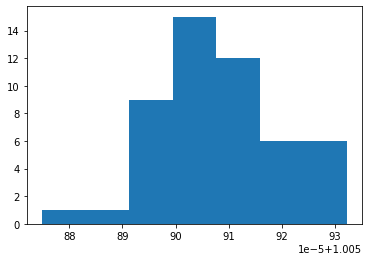

In [ ]:
import matplotlib.pyplot as plt
plt.hist(S_samples, bins='auto')

this shows us a measure of how accurate our monte carlo approximation is, if we approximate the error as normal, we can determine a standard error region. 

In [ ]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=S0)
mc.setOption(True, True, K, N)
mc.setRNG(np.random.seed(22))
print(p_tilda)
S, V = mc.simulatePathDependent(S0, N, 32, p_tilda, True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 256, p_tilda, True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**10, p_tilda, True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**11, p_tilda,  True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

S, V = mc.simulatePathDependent(S0, N, 2**21, p_tilda,  True)
print("V0: ", np.mean(V), "SN: ", np.mean(S))

0.18367346938773846
V0:  0.016330196352992418 SN:  0.9940740894389662
V0:  0.013612525427764996 SN:  1.000649713248253
V0:  0.014263143606279633 SN:  1.000083659970084
V0:  0.014043153707195912 SN:  1.0005261923722562
V0:  0.014181400661865018 SN:  1.0000101565557424


In [ ]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

ep = be.bapm_exact(u, d, r, S0)
ep.setOption(True, True, K, N)
p_tilda = ep.riskNeutralProbability()
p = p_tilda * 0.9

paths = ep.generateRandomPaths(maxPathLength=10, numPaths=5, p=p)
SA_10 = ep.stockPrice(len(paths[0])-np.sum(paths, axis=1), np.sum(paths, axis=1))

import random
for SE in SA_10:
    mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=SE)
    mc.setRNG(np.random.seed(random.randint(0, 2**32)))
    mc.setOption(True, True, K, N)
    maxVal=-99999999999999
    stock = S0
    for t in range(10):
        stock = stock * (1 + u) if paths[0][t] == 1 else stock * (1 + d)
        maxVal = np.maximum(maxVal, stock * (1+r)**(10-t))

    S, V = mc.simulatePathDependent(S0, N, 2**21, p_tilda, True, maxVal)    
    print("SA: ", SE, " V0: ", np.mean(V), " SN: ", np.mean(S), " S - SE: ", np.mean(S) - SE)


SA:  1.0059048618844324  V0:  0.014203650910349521  SN:  0.9999905865712665  S - SE:  -0.0059142753131659065
SA:  1.0059048618844324  V0:  0.014186587156586626  SN:  1.0000172466562463  S - SE:  -0.005887615228186149
SA:  1.010833302863568  V0:  0.014188097756268015  SN:  0.9999982647247894  S - SE:  -0.01083503813877873
SA:  1.0059048618844324  V0:  0.014198178870517721  SN:  0.9999916316676335  S - SE:  -0.005913230216798904
SA:  1.0059048618844324  V0:  0.014179891690147968  SN:  1.0000217804208449  S - SE:  -0.005883081463587514


In [ ]:
S0 = 1
u = 1 + 5 * 10**(-3)
d = 1 + 10**(-4)
r = 10**(-3)
N = 100
K = (1+r)**N * S0

ep = be.bapm_exact(u, d, r, S0)
ep.setOption(True, True, K, N)
p_tilda = ep.riskNeutralProbability()
p = p_tilda * 0.9

paths = ep.generateRandomPaths(maxPathLength=10, numPaths=1, p=p)
SA_10 = ep.stockPrice(len(paths[0])-np.sum(paths, axis=1), np.sum(paths, axis=1))



import random
for SE in SA_10:
    for i in range(25):
        mc = mcs.MonteCarlo(up_factor=u, down_factor=d, risk_free_rate=r, S0=SE)
        mc.setRNG(np.random.seed(random.randint(0, 2**16)))
        mc.setOption(True, True, K, N)
        maxVal=-99999999999999
        stock = S0
        for t in range(10):
            stock = stock * (1 + u) if paths[0][t] == 1 else stock * (1 + d)
            maxVal = np.maximum(maxVal, stock * (1+r)**(10-t))

        S, V = mc.simulatePathDependent(S0, N, 2**21, p_tilda, True, maxVal)
        print("SA: ", SE, " V0: ", np.mean(V), " SN: ", np.mean(S), " S - SE: ", np.mean(S) - SE)
        S_samples.append(np.mean(S))

print("Mean: ", np.mean(S_samples), " Std: ", np.var(S_samples, ddof=1))


SA:  1.0059048618844324  V0:  0.014183391643019327  SN:  1.0000088308092623  S - SE:  -0.005896031075170116
SA:  1.0059048618844324  V0:  0.01417429028635954  SN:  1.000014110974597  S - SE:  -0.005890750909835374
SA:  1.0059048618844324  V0:  0.01418137204075522  SN:  1.0000186119908043  S - SE:  -0.0058862498936280705
SA:  1.0059048618844324  V0:  0.014192538329418726  SN:  1.0000080679764773  S - SE:  -0.005896793907955056
SA:  1.0059048618844324  V0:  0.014182238050250425  SN:  1.0000106481922502  S - SE:  -0.0058942136921822375
SA:  1.0059048618844324  V0:  0.014192505720281998  SN:  1.0000063580785368  S - SE:  -0.005898503805895627
SA:  1.0059048618844324  V0:  0.014193424247461273  SN:  1.0000049870862289  S - SE:  -0.0058998747982035304
SA:  1.0059048618844324  V0:  0.014199611447928624  SN:  0.9999909168358786  S - SE:  -0.005913945048553804
SA:  1.0059048618844324  V0:  0.014180326848288929  SN:  1.00000807068692  S - SE:  -0.005896791197512297
SA:  1.0059048618844324  V0:  

(array([4., 5., 4., 4., 6., 2.]),
 array([0.99997015, 0.99998049, 0.99999082, 1.00000116, 1.00001149,
        1.00002183, 1.00003216]),
 <BarContainer object of 6 artists>)

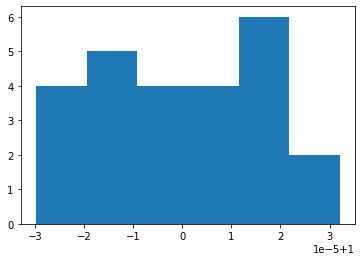

In [ ]:
import matplotlib.pyplot as plt
plt.hist(S_samples, bins='auto')